In [1]:
import pandas as pd

klienci = pd.read_csv("data/klienci.csv")
klienci

,klientID,plec,wiek,roczny_dochod,wskaznik_wydatkow
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<Axes: xlabel='roczny_dochod', ylabel='wskaznik_wydatkow'>

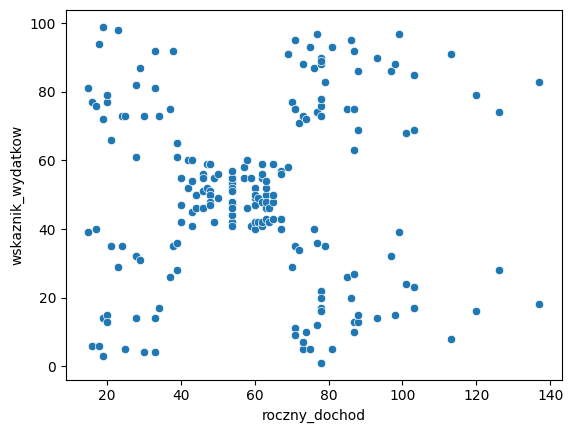

In [2]:
import seaborn as sns

sns.scatterplot(x = klienci["roczny_dochod"], y = klienci["wskaznik_wydatkow"])

In [3]:
from sklearn.preprocessing import StandardScaler

x = klienci[["roczny_dochod", "wskaznik_wydatkow"]]
scaler = StandardScaler()
z = scaler.fit_transform(x)

d:\CDV\mad_gr2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Nie można odnaleźć określonego pliku
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\CDV\mad_gr2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

clusters_kmeans
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


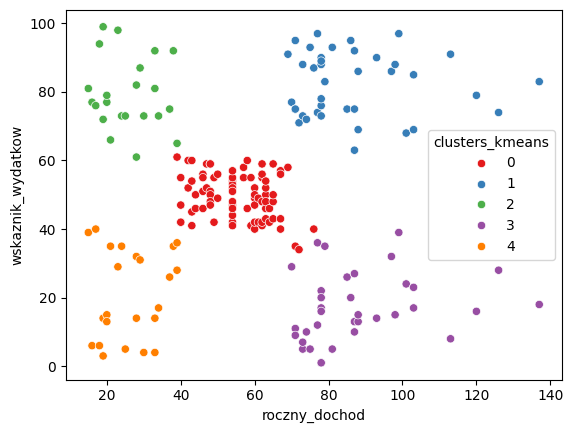

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters_kmeans = kmeans.fit_predict(z)
clusters_kmeans

klienci["clusters_kmeans"] = clusters_kmeans
sns.scatterplot(x = klienci["roczny_dochod"], y = klienci["wskaznik_wydatkow"], hue = klienci["clusters_kmeans"], palette="Set1")
print(klienci["clusters_kmeans"].value_counts())

Ustalenie optymalnej liczby klastrów w KMeans

In [5]:
from sklearn.metrics import calinski_harabasz_score

inertia = []
ch_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusters_kmeans = kmeans.fit_predict(z)
    inertia.append(kmeans.inertia_) # suma kwadratów odległości punktów od środka klastra
    ch_scores.append(calinski_harabasz_score(z, clusters_kmeans))

print("Inertia:", inertia)
print("Calinski-Harabasz scores:", ch_scores)

Inertia: [273.66888662642015, 157.70400815035947, 109.22822707921345, 65.56840815571681, 60.13287487193422, 49.66824483736798, 37.31912287833883, 32.49508119910091, 30.059322694042205]
Calinski-Harabasz scores: [np.float64(91.40081927586573), np.float64(151.3351212635948), np.float64(173.9210611775394), np.float64(248.64932001536357), np.float64(219.29509412369103), np.float64(226.88550457064687), np.float64(266.5608829108479), np.float64(270.01563352345875), np.float64(259.8148608542566)]


Wykres osypiska

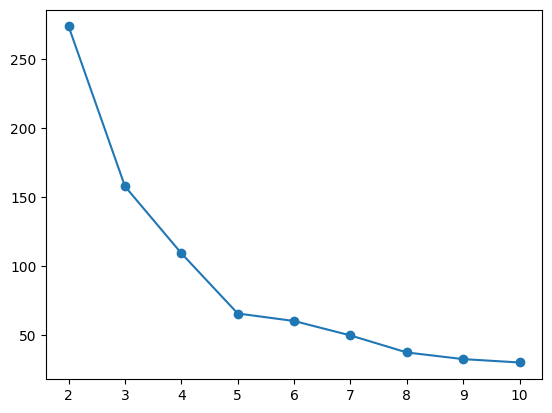

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(2, 11), inertia, marker='o')

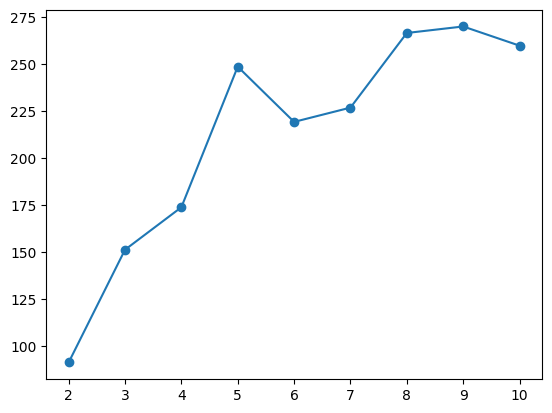

In [7]:
plt.plot(range(2, 11), ch_scores, marker='o')

In [8]:
klienci[["roczny_dochod", "wskaznik_wydatkow", "clusters_kmeans"]].groupby("clusters_kmeans").mean()

,roczny_dochod,wskaznik_wydatkow
clusters_kmeans,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


# Zadanie

In [9]:
auta = pd.read_csv("data/auta.csv", sep=";")
auta

,nr,marka,model,pojemnosc,przebieg,lata,cena,diesel
0,1,Fiat,Fiat Seicento ...,899,52000,5,9500,0
1,2,Volkswagen,Volkswagen Corrado ...,2000,188000,12,15900,0
2,4,Ford,Ford Focus Combi ...,1800,125000,5,27900,1
3,5,Opel,Opel Vectra ...,1800,148000,9,16600,0
4,7,Citroen,Citroen Xsara II ...,1400,70000,5,20000,0
5,8,Toyota,Toyota Avensis ...,1600,105000,6,27500,0
6,9,BMW,BMW 320 ...,2000,164000,11,15600,0
7,10,Peugeot,Peugeot 206 ...,1124,72000,6,16000,0
8,11,Volkswagen,Volkswagen Golf IV ...,1400,52000,3,26500,0
9,12,Audi,Audi A3 ...,1600,108000,5,34000,0


Analiza korelacji przed grupowaniem - wysoka korelacja (powyżej 0,9) między cechami może sugerować, że są one redundantne i nie wnoszą dodatkowej informacji do procesu grupowania.

In [10]:
auta[["pojemnosc", "przebieg", "lata", "cena"]].corr()

,pojemnosc,przebieg,lata,cena
pojemnosc,1.000000,0.721918,0.360621,0.351001
przebieg,0.721918,1.000000,0.642138,-0.063452
lata,0.360621,0.642138,1.000000,-0.601429
cena,0.351001,-0.063452,-0.601429,1.000000


Sprawdzenie zmienności cech przed grupowaniem za pomocą współczynnika zmienności (odchylenie standardowe podzielone przez średnią) - cechy o wysokiej zmienności mogą być bardziej istotne w procesie grupowania od takich o niskiej zmienności (np. poniżej 5%).

In [11]:
auta[["pojemnosc", "przebieg", "lata", "cena"]].std()/auta[["pojemnosc", "przebieg", "lata", "cena"]].mean()

pojemnosc    0.198106
przebieg     0.361838
lata         0.359148
cena         0.400801
dtype: float64

In [12]:
x_auta = auta[["pojemnosc", "przebieg", "lata", "cena"]]
scaler_auta = StandardScaler()
z_auta = scaler_auta.fit_transform(x_auta)


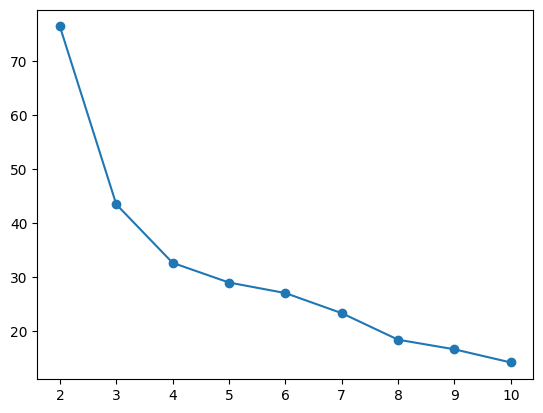

In [13]:
inertia_auta = []
ch_scores_auta = []
for i in range(2, 11):
    kmeans_auta = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusters_kmeans_auta = kmeans_auta.fit_predict(z_auta)
    inertia_auta.append(kmeans_auta.inertia_)
    ch_scores_auta.append(calinski_harabasz_score(z_auta, clusters_kmeans_auta))

plt.plot(range(2, 11), inertia_auta, marker='o') 

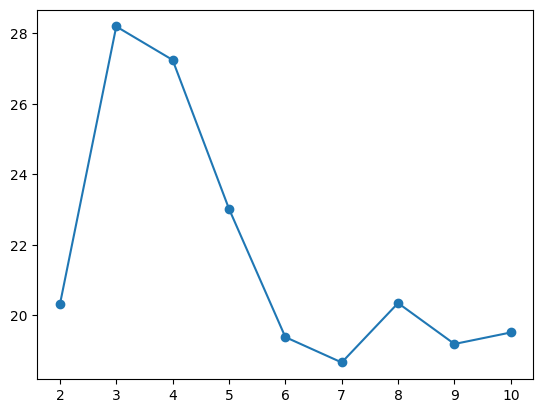

In [14]:
plt.plot(range(2, 11), ch_scores_auta, marker='o')

In [15]:
auta["clusters_kmeans"] = KMeans(n_clusters=3, init='k-means++', random_state=42).fit_predict(z_auta)
auta[["pojemnosc", "przebieg", "lata", "cena", "clusters_kmeans"]].groupby("clusters_kmeans").mean()

,pojemnosc,przebieg,lata,cena
clusters_kmeans,,,,
0,1226.909091,71327.272727,5.727273,14727.181818
1,1674.100000,160800.000000,9.900000,12940.000000
2,1690.909091,124363.636364,5.363636,25963.636364


# Grupowanie hierarchiczne

<Axes: xlabel='roczny_dochod', ylabel='wskaznik_wydatkow'>

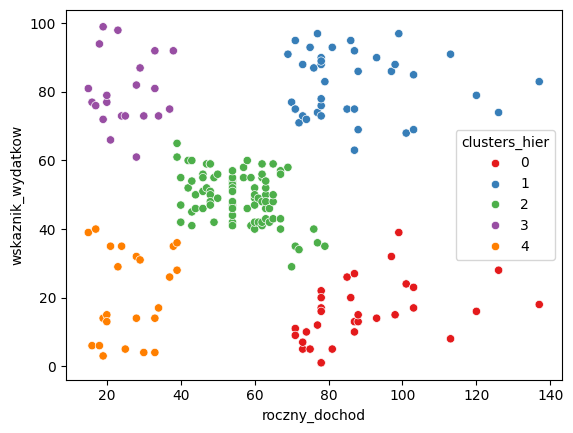

In [27]:
from sklearn.cluster import AgglomerativeClustering

group_hier = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters_hier = group_hier.fit_predict(z)

klienci["clusters_hier"] = clusters_hier
sns.scatterplot(x = klienci["roczny_dochod"], y = klienci["wskaznik_wydatkow"], hue = klienci["clusters_hier"], palette="Set1")

In [21]:
pd.crosstab(klienci["clusters_kmeans"], klienci["clusters_hier"])

clusters_hier,0,1,2,3,4
clusters_kmeans,,,,,
0,0,0,81,0,0
1,0,39,0,0,0
2,0,0,1,21,0
3,32,0,3,0,0
4,0,0,0,0,23


## Dendrogram



{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [35.0, 35.0, 54.375, 54.375],
  [12.5, 12.5, 44.6875, 44.6875],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [142.5, 142.5, 170.0, 170.0],
  [125.0, 125.0, 156.25, 156.25],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [190.0, 190.0, 212.5, 212.5],
  [140.625, 140.625, 201.25, 201.25],
  [102.5, 102.5, 170.9375, 170.9375],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [250.0, 250.0, 297.5, 297.5],
  [335.0, 335.0, 345.0, 345.0],
  [355.0

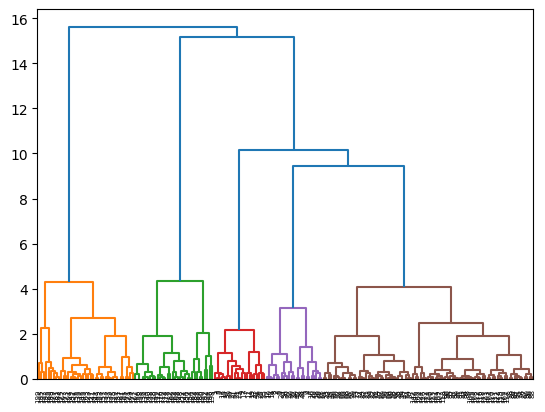

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(z, method='ward')

dendrogram(linked, color_threshold=8)

## Zadanie

In [40]:
auta["clusters_hier"] = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(z_auta)
pd.crosstab(auta["clusters_kmeans"], auta["clusters_hier"])

clusters_hier,0,1,2
clusters_kmeans,,,
0,1,0,10
1,0,10,0
2,11,0,0


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [20.0, 20.0, 50.0, 50.0],
  [5.0, 5.0, 35.0, 35.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [20.0, 20.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [121.25, 121.25, 171.25, 171.25],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [272.5, 272.5, 302.5, 302.5],
  [242.5, 242.5, 287.5, 287.5],
  [212.5, 212.5, 265.0, 265.0],
  [146.25, 146.25, 238.75, 238.75],
  [51.25, 51.25, 192.5, 192.5]],
 'dcoord': [[0.0,
   np.flo

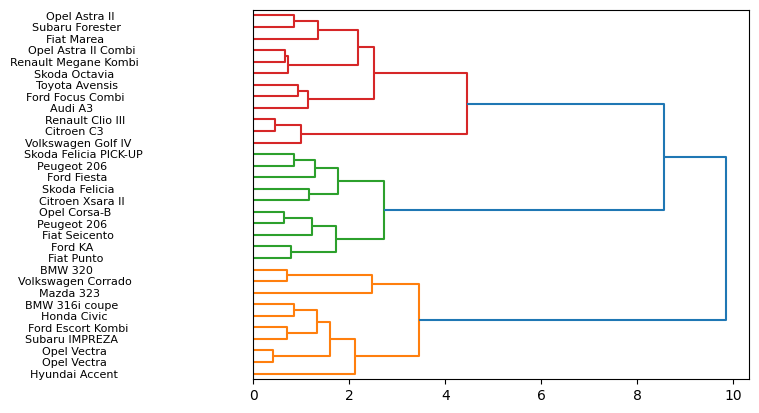

In [44]:
linked_auta = linkage(z_auta, method='ward')

dendrogram(linked_auta, orientation='right', labels=auta['model'].values, color_threshold=5)

# Redukcja wymiarowości

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_auta = pca.fit_transform(z_auta)
pca_auta

array([[-2.2649576 , -1.93486919],
       [ 3.09838979,  0.06499771],
       [-0.12403108,  1.84101676],
       [ 1.44255989,  0.10514588],
       [-1.41720294,  0.11003092],
       [-0.51135222,  1.23782888],
       [ 2.51294384,  0.09317955],
       [-1.5154057 , -0.92886173],
       [-2.31830142,  1.0458411 ],
       [-0.86417219,  2.10187523],
       [ 2.93376122, -1.93631295],
       [-1.55669197, -0.58944159],
       [ 1.13478108,  1.83025584],
       [ 0.61694888,  1.22533776],
       [ 1.67323144, -0.07759142],
       [-1.8820549 ,  1.26896501],
       [ 1.45463613, -0.93615327],
       [ 0.19809213,  0.5452477 ],
       [ 0.57113423,  2.25531809],
       [ 0.81094729, -0.80890358],
       [ 0.81788316, -0.86520775],
       [-1.5519527 ,  1.18858142],
       [ 1.0481377 , -1.15186284],
       [ 1.45652064, -0.38408344],
       [-1.81085741, -1.47910872],
       [ 0.38855459,  0.73933228],
       [-0.64937507, -0.35234238],
       [-0.40617745, -1.17628992],
       [-1.39576053,

In [56]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.54784079 0.3751816 ]


In [57]:
print(sum(pca.explained_variance_ratio_))

0.9230223931128255


<Axes: >

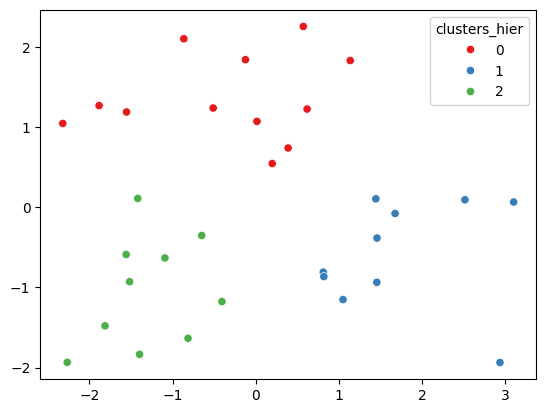

In [59]:
sns.scatterplot(x=pca_auta[:, 0], y=pca_auta[:, 1], hue=auta['clusters_hier'], palette="Set1")

In [ ]:
! pip install umap-learn

In [67]:
from umap import UMAP

umap = UMAP(n_components=2, random_state=42)
umap_auta = umap.fit_transform(z_auta)
umap_auta

d:\CDV\mad_gr2\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\CDV\mad_gr2\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


array([[2.3136568 , 2.7850158 ],
       [3.163926  , 6.9011602 ],
       [0.53303933, 5.1291037 ],
       [3.8802521 , 6.876618  ],
       [1.7807589 , 3.698022  ],
       [0.86164105, 4.8313456 ],
       [3.4073586 , 6.59095   ],
       [2.3802202 , 3.132618  ],
       [0.9376118 , 3.6330838 ],
       [0.36216798, 4.5292873 ],
       [3.6187205 , 7.4477634 ],
       [1.728215  , 3.0484068 ],
       [0.6733795 , 5.713072  ],
       [1.1894361 , 5.8675838 ],
       [3.5949852 , 7.203489  ],
       [0.53714   , 3.6430972 ],
       [4.084252  , 7.5717916 ],
       [1.6659578 , 5.886592  ],
       [0.22282359, 5.5168304 ],
       [3.065664  , 7.5695367 ],
       [2.7378616 , 7.8423724 ],
       [0.6268855 , 4.0556703 ],
       [3.4191782 , 8.037044  ],
       [3.765127  , 7.7241025 ],
       [2.293288  , 2.5805228 ],
       [1.4688724 , 5.4301333 ],
       [2.5238726 , 3.9831378 ],
       [3.0119727 , 3.4762657 ],
       [2.7703261 , 2.5886786 ],
       [3.055051  , 2.948358  ],
       [1.

<Axes: >

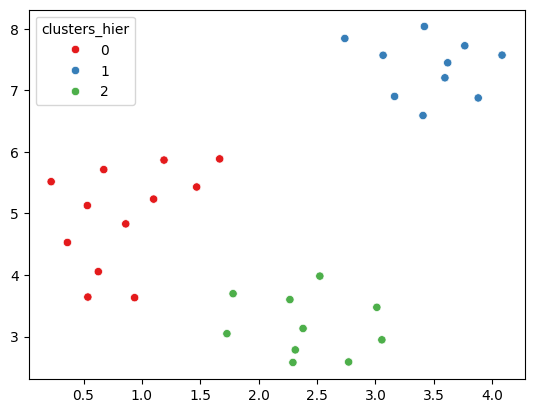

In [68]:
sns.scatterplot(x=umap_auta[:, 0], y=umap_auta[:, 1], hue=auta['clusters_hier'], palette="Set1")